## ThinkDSP

This notebook contains code examples from Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### Chirp

Make a linear chirp from A3 to A5.

In [2]:
signal = thinkdsp.Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Here's what the waveform looks like near the beginning.

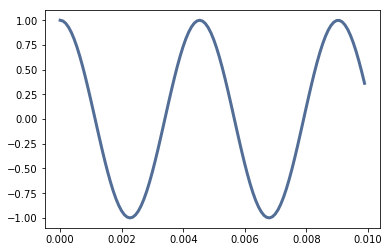

In [3]:
wave1.segment(start=0, duration=0.01).plot()

And near the end.

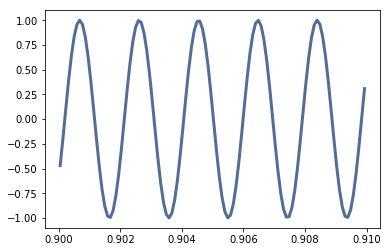

In [4]:
wave1.segment(start=0.9, duration=0.01).plot()

Here's an exponential chirp with the same frequency range and duration.

In [5]:
signal = thinkdsp.ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.make_audio()

The spectrum of a 

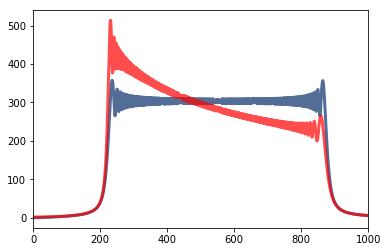

In [6]:
spec1 = wave1.make_spectrum()
spec2 = wave2.make_spectrum()
spec1.plot()
spec2.plot(color='red')
thinkplot.Config(xlim=[0,1000])

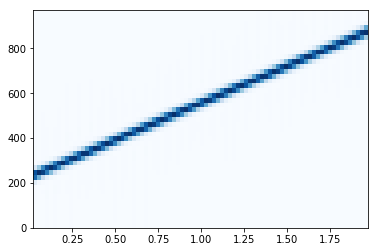

In [7]:
spectrogram1 = wave1.make_spectrogram(seg_length=512)
spectrogram2 = wave2.make_spectrogram(seg_length=512)
spectrogram1.plot(high=1000)

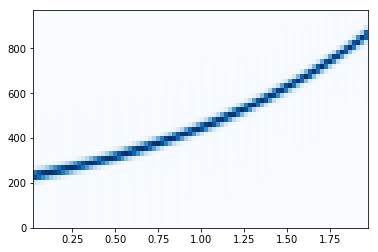

In [8]:
spectrogram2.plot(high=1000)

## Leakage

Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [9]:
signal = thinkdsp.SinSignal(freq=440)

If the duration is an integer multiple of the period, the beginning and end of the segment line up, and we get minimal leakage.

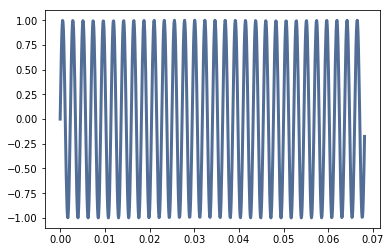

In [10]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()

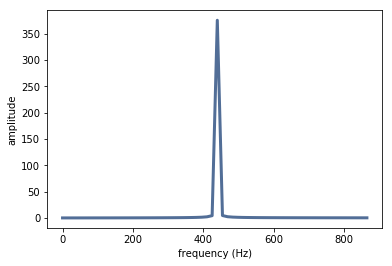

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude', legend=False)

If the duration is not a multiple of a period, the leakage is pretty bad.

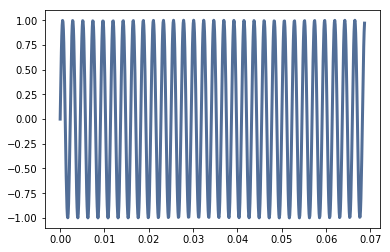

In [12]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()

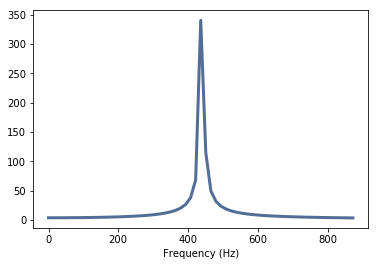

In [13]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

Windowing helps (but notice that it reduces the total energy).

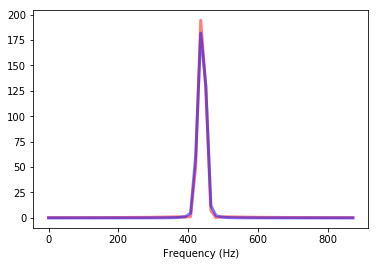

In [14]:
def windowplot(winFunc,color):
    duration = signal.period * 30.25
    wave = signal.make_wave(duration)
    wave.window(winFunc(len(wave.ts)))
    spectrum = wave.make_spectrum()
    spectrum.plot(high=880,color=color,alpha=0.5)
    thinkplot.config(xlabel='Frequency (Hz)')

#-- hamming window
windowplot(np.hamming,'red')
# windowplot(np.blackman,'blue')
# windowplot(np.bartlett,'blue')
windowplot(np.hanning,'blue')

## Spectrogram

If you blindly compute the DFT of a non-periodic segment, you get "motion blur".

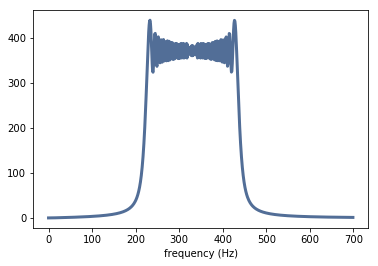

In [15]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
thinkplot.config(xlabel='frequency (Hz)')

A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

In [16]:
def plot_spectrogram(wave, seg_length):
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


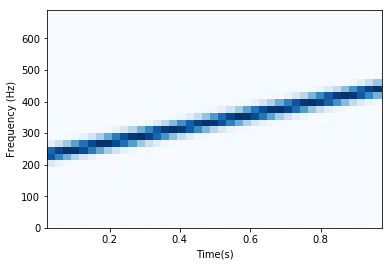

In [17]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

If you increase the segment length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


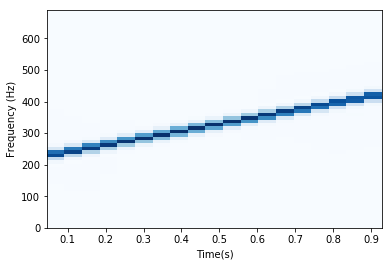

In [18]:
plot_spectrogram(wave, 1024)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


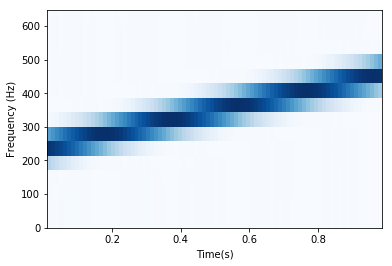

In [19]:
plot_spectrogram(wave, 256)

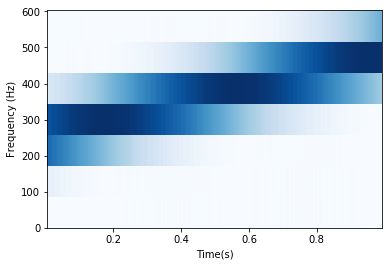

In [20]:
slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

## Spectrum of a chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [21]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal = thinkdsp.Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude')
    
    #TODO: add player

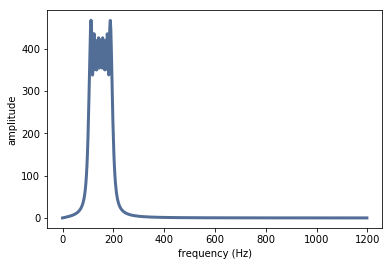

In [22]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

### Exercises

In [23]:
class SawtoothChirp(thinkdsp.Chirp):
    
    def _evaluate(self, ts, freqs):
        PI2=2*np.pi
        dts = np.diff(ts)
        dps = freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        frac, _ = np.modf(phases)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

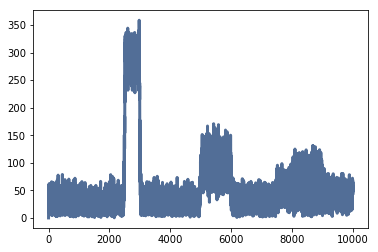

In [24]:
STC = SawtoothChirp(start=2500, end=3000)
STC_wave = STC.make_wave(duration=1,framerate=20000)
STC_spectrum = STC_wave.make_spectrum()
STC_spectrum.plot()

In [25]:
STC_wave.make_audio()

In [26]:
rhapblue_total = thinkdsp.read_wave('rhapblue11924_64kb.mp3.wav')
rhapblue_wave = rhapblue_total.segment(start=6.5,duration=3.9)
rhapblue_wave.make_audio()

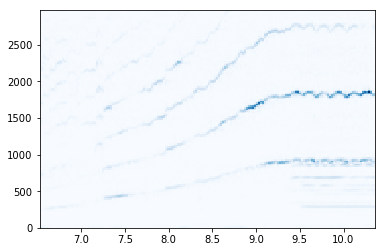

In [27]:
rhapblue_spectrogram = rhapblue_wave.make_spectrogram(512)
rhapblue_spectrogram.plot(high=3000)

In [28]:
class TromboneGliss(thinkdsp.Chirp):
    
    def evaluate(self, ts):
        Ls = np.linspace(1/self.start, 1/self.end, len(ts)-1)
        freqs = 1/Ls
        return self._evaluate(ts, freqs)


In [29]:
low  = 349
high = 262
trom_signal1 = TromboneGliss(low, high)
trom_wave1 = trom_signal1.make_wave(duration=1)
trom_wave1.apodize()
trom_wave1.make_audio()

In [30]:
low  = 262
high = 349
trom_signal2 = TromboneGliss(low, high)
trom_wave2 = trom_signal2.make_wave(duration=1)
trom_wave2.apodize()
trom_wave2.make_audio()

In [31]:
trom_wave = trom_wave1 | trom_wave2
trom_wave.make_audio()

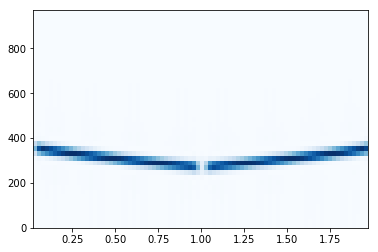

In [32]:
trom_wave.make_spectrogram(512).plot(high=1000)

In [2]:
vowels = thinkdsp.read_wave('87778__marcgascon7__vocals.wav')
vowels.make_audio()

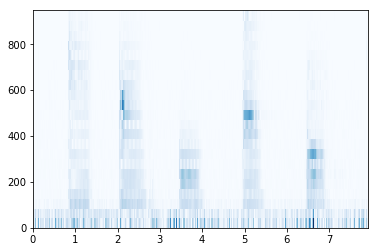

In [5]:
vowels_spectrogram = vowels.make_spectrogram(1024)
vowels_spectrogram.plot(high=1000)

In [15]:
vowel_dict = {}
names = ['a','e','i','o','u']
starts = [1,2.2,3.5,5.1,6.5]
duration = 0.25
for name,start in zip(names,starts):
    vowel_dict[name] = vowels.segment(start,duration).make_spectrum()

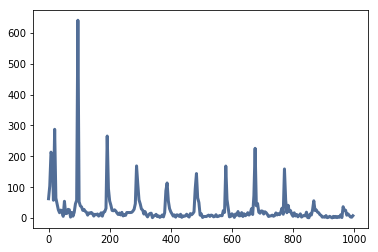

In [22]:
high = 1000
vowel_dict['a'].plot(high=high)

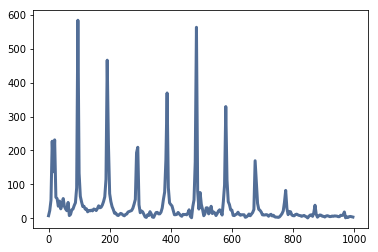

In [23]:
vowel_dict['e'].plot(high=high)

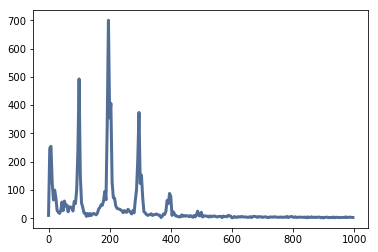

In [24]:
vowel_dict['i'].plot(high=high)

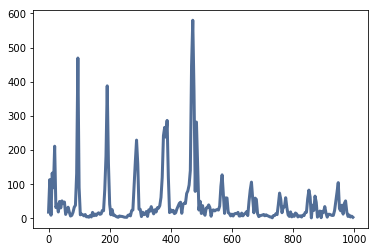

In [25]:
vowel_dict['o'].plot(high=high)

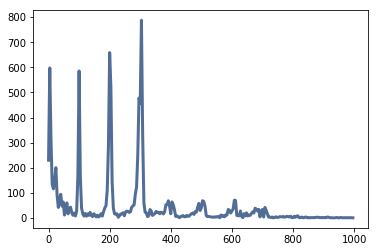

In [26]:
vowel_dict['u'].plot(high=high)